# Imports

for this little project, we are going to use matplotlib, cv2 numpy and siamxt. Siamxt is a library based on the paper "Salembier, P., Oliveras, A. and Garrido, L., 1998. Antiextensive connected operators for image and sequence processing. IEEE Transactions on Image Processing, 7(4), pp.555-570.". The siamxt is available in https://github.com/rmsouza01/siamxt and is really easy to install

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.patches as patches
import collections

In [2]:
import siamxt

# First Problem - Sample1

Lets open it and take a look at the image

In [3]:
img_1 = cv2.imread("sample1.png")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

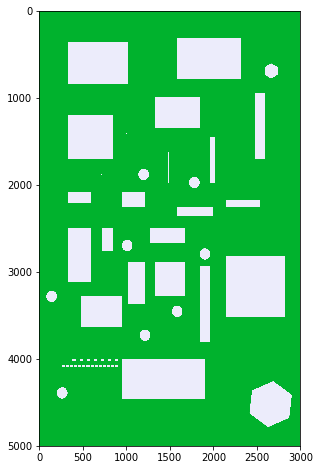

In [4]:
fig, ax = plt.subplots(1,figsize=(8,8))

ax.imshow(img_1)
plt.show()

as we can see, the image has a green background. Let's get only the green channel of the image

In [5]:
img_1g = img_1[:,:,1]

after doing this, lets just change the intensities of background and the rest of the image

In [6]:
im_min = img_1g.min()
img_1g[img_1g==im_min]=0
img_1g[img_1g>im_min]=255

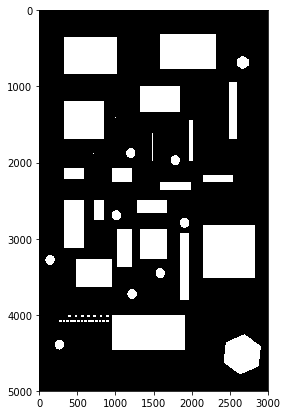

In [7]:
fig, ax = plt.subplots(1,figsize=(7,7))

ax.imshow(img_1g,cmap="gray")
plt.show()

Right now, we have the same image but in grayscale with background as 0 and shapes as 255. Lets now run the max-tree

In [9]:
Bc = np.ones((3,3),dtype = bool)
mxt = siamxt.MaxTreeAlpha(img_1g,Bc)

we are going to select xmin, ymin, xmax and ymax to create the bounding boxes of each shape and the area:

In [10]:
ymin = mxt.node_array[6,1:]
ymax = mxt.node_array[7,1:]
xmin = mxt.node_array[9,1:]
xmax = mxt.node_array[10,1:]
areas = mxt.node_array[3,1:]

now, lets use the area to plot these with the **original image**. Rectangles have area and width*height similar, as the pixels occupy all width and height in a rectangle. The Hexagon can be found because it has less area than Circle. So Area of Hexagon < Circle < Rectangle. And then:

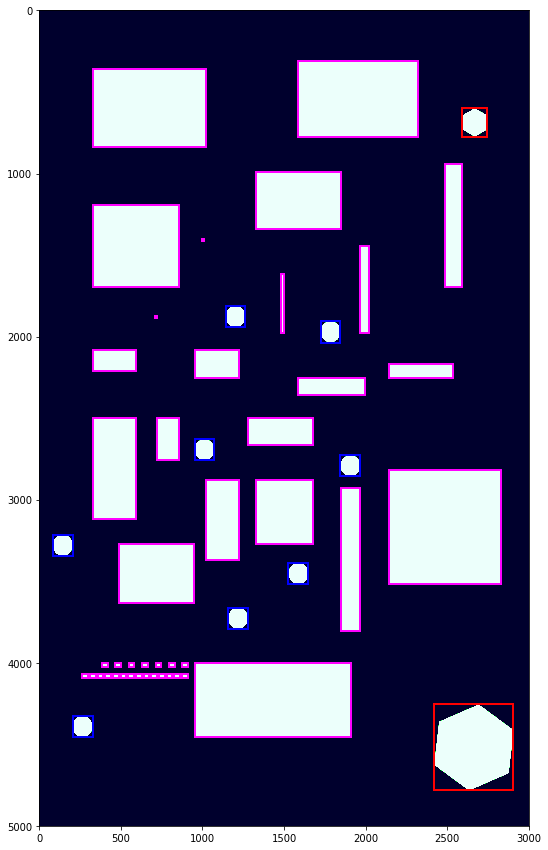

In [11]:
fig, ax = plt.subplots(1,figsize=(15,15))

ax.imshow(img_1)

for x0,x1,y0,y1,area in zip(xmin,xmax,ymin,ymax, areas):
    w=x1-x0
    h=y1-y0
    if (area/(w*h))<0.78:
        rect = patches.Rectangle((x0,y0),w,h,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    elif (area/(w*h))<0.95:
        rect = patches.Rectangle((x0,y0),w,h,linewidth=2,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
    else:
        rect = patches.Rectangle((x0,y0),w,h,linewidth=2,edgecolor='magenta',facecolor='none')
        ax.add_patch(rect)

plt.show()
    

**It is possible to see that we found all shapes in the image and their respective location. The magenta ones are rectangles, red are hexagons and blue ones are circles**

# Second Problem - Sample4

Lets open it and take a look at the image

In [12]:
img_4 = cv2.imread("sample4.png")
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)

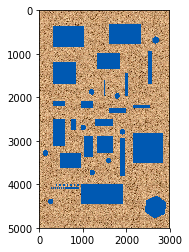

In [13]:
plt.imshow(img_4)

In this image here, we see that the shapes are in blue, so lets get the blue channel of the image

In [14]:
img_4b = img_4[:,:,2]

we can also see from this image that it has a lot of noise in the image. we could use total variation or other denoising technique but there is a little trick in here. We know that the shapes are the same intensity, so if we get the mode of this image, we can filter most of the random noise in the image. So lets do it:

In [17]:
mode = collections.Counter(np.ravel(img_4b)).most_common()[0][0]

Now, we can binarize our image using this mode value:

In [18]:
img_4b[img_4b!=mode]=0
img_4b[img_4b==mode]=255


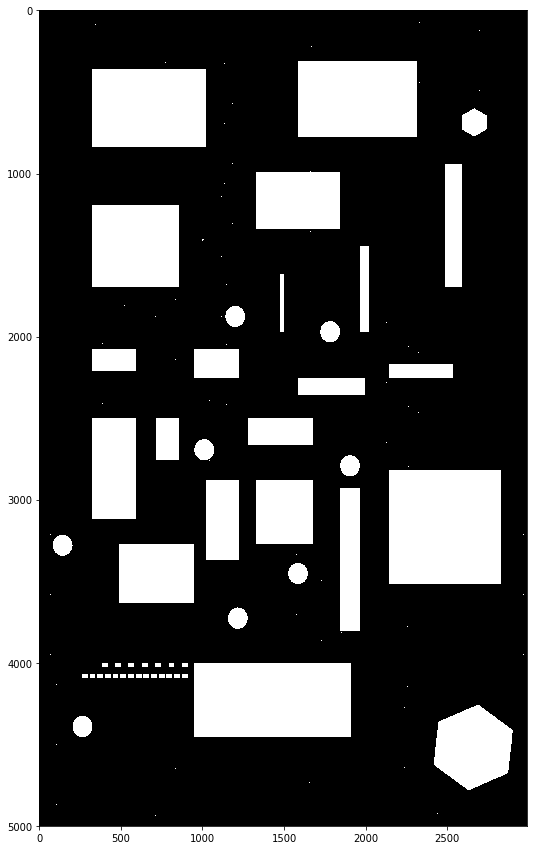

In [19]:
fig, ax = plt.subplots(1,figsize=(15,15))

ax.imshow(img_4b,cmap="gray")

plt.show()

We are clear of most part of the noise. We just got some points left. Lets now run the max-tree getting only connected components with area bigger than 5:

In [20]:
area = 5
Bc = np.ones((3,3),dtype = bool)
mxt = siamxt.MaxTreeAlpha(img_4b,Bc)
mxt.areaOpen(area)
img_filtered =  mxt.getImage()


Let's check the image:

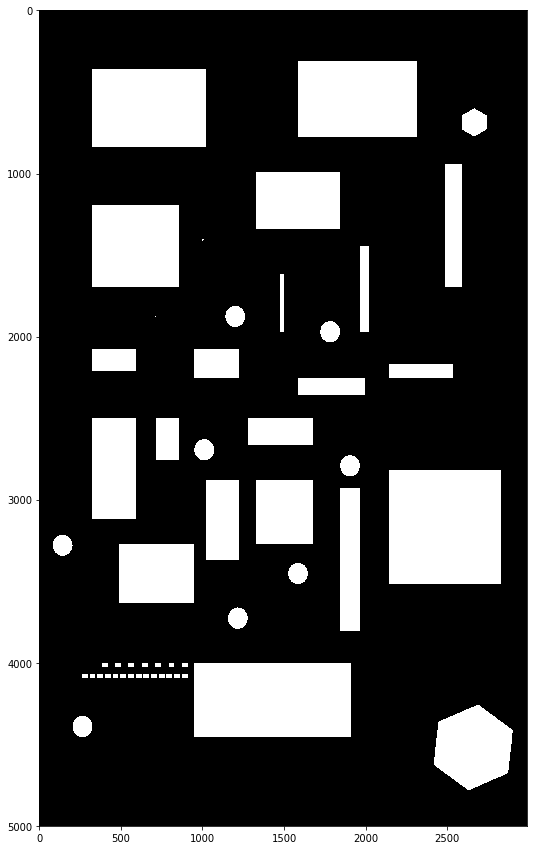

In [21]:
fig, ax = plt.subplots(1,figsize=(15,15))

ax.imshow(img_filtered,cmap="gray")

plt.show()

**We dont have noise anymore. Lets do the same process as we did for Sample1 to plot the shapes:**

In [22]:
ymin = mxt.node_array[6,1:]
ymax = mxt.node_array[7,1:]
xmin = mxt.node_array[9,1:]
xmax = mxt.node_array[10,1:]
areas = mxt.node_array[3,1:]

now, lets use the area to plot these with the **original image**. Rectangles have area and width*height similar, as the pixels occupy all width and height in a rectangle. The Hexagon can be found because it has less area than Circle. So Area of Hexagon < Circle < Rectangle. And then:

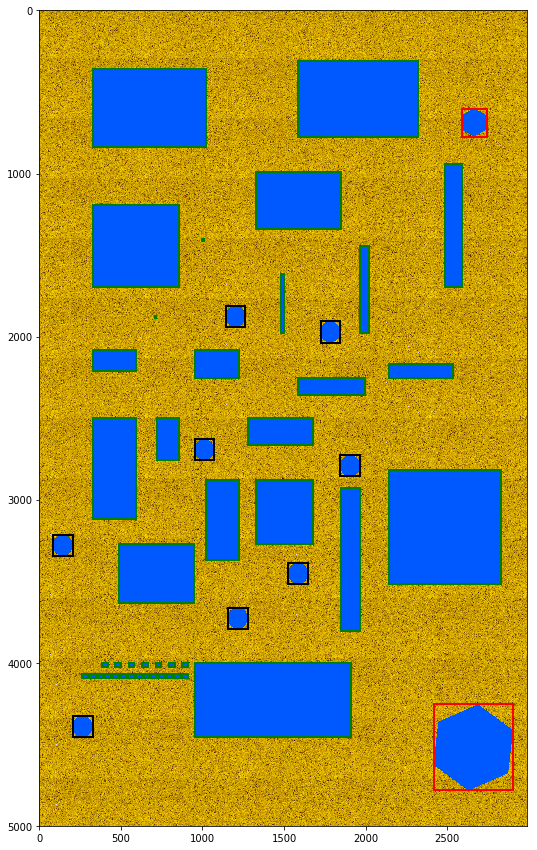

In [23]:
fig, ax = plt.subplots(1,figsize=(15,15))

ax.imshow(img_4)

for x0,x1,y0,y1,area in zip(xmin,xmax,ymin,ymax, areas):
    w=x1-x0
    h=y1-y0
    if (area/(w*h))<0.78:
        rect = patches.Rectangle((x0,y0),w,h,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    elif (area/(w*h))<0.95:
        rect = patches.Rectangle((x0,y0),w,h,linewidth=2,edgecolor='black',facecolor='none')
        ax.add_patch(rect)
    else:
        rect = patches.Rectangle((x0,y0),w,h,linewidth=2,edgecolor='g',facecolor='none')
        ax.add_patch(rect)

plt.show()
    

**It is possible to see that we found all shapes in the image and their respective location. The green ones are rectangles, red are hexagons and black ones are circles**